In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
# Generate synthetic transportation data
np.random.seed(42)  # for reproducibility

# Number of data points
num_samples = 1000

# Generate random values for features
distance = np.random.uniform(1, 100, num_samples)  # Distance in miles
traffic_conditions = np.random.choice(['light', 'moderate', 'heavy'], num_samples)  # Traffic conditions
weather = np.random.choice(['sunny', 'rainy', 'snowy'], num_samples)  # Weather conditions

# Generate target variable (time_taken) based on features
# A simple formula is used here. You can modify it based on your requirements.
# Assuming time_taken is influenced by distance, traffic, and weather.
time_taken = distance * 0.1 + (traffic_conditions == 'heavy') * 10 + (weather == 'rainy') * 5  # Example formula

# Create DataFrame
transportation_data = pd.DataFrame({
    'distance': distance,
    'traffic_conditions': traffic_conditions,
    'weather': weather,
    'time_taken': time_taken
})

# Save data to CSV
transportation_data.to_csv("transportation_data.csv", index=False)

In [3]:
# Load transportation data (example: historical route data)
data = pd.read_csv("transportation_data.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=["traffic_conditions", "weather"])

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=["time_taken"])
y = data_encoded["time_taken"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0011328722920232487


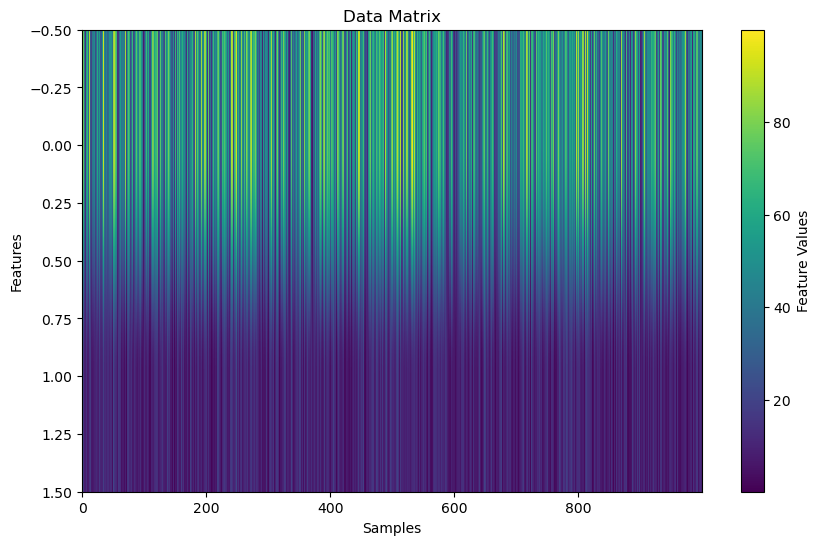

In [4]:
data = pd.read_csv("transportation_data.csv")

# Drop non-numeric columns for visualization
data_numeric = data.drop(columns=["traffic_conditions", "weather"])

# Plotting the data matrix
plt.figure(figsize=(10, 6))
plt.imshow(data_numeric.T, aspect='auto', cmap='viridis')
plt.colorbar(label='Feature Values')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.title('Data Matrix')
plt.show()

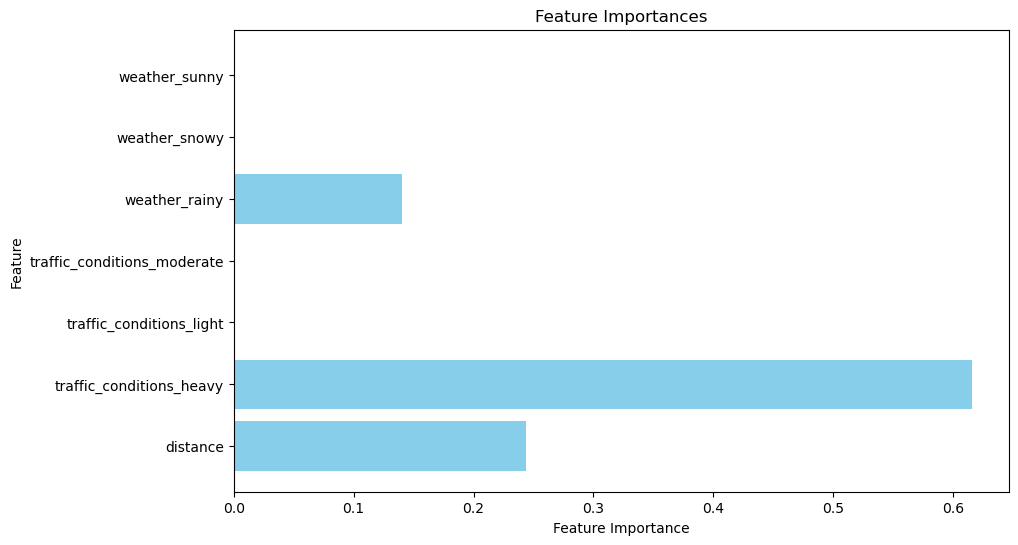

Predicted time taken for the route: [23.02211331]


In [5]:
# Load transportation data
data = pd.read_csv("transportation_data.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=["traffic_conditions", "weather"])

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=["time_taken"])
y = data_encoded["time_taken"]

# Train a machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)  # Train on the entire dataset

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Assuming you have new data for prediction
new_data = pd.DataFrame({
    'distance': [80],
    'traffic_conditions_heavy': [1],  # Assuming heavy traffic
    'traffic_conditions_light': [0],  # Assuming no light traffic
    'traffic_conditions_moderate': [0],  # Assuming no moderate traffic
    'weather_rainy': [1],  # Assuming rainy weather
    'weather_snowy': [0],  # Assuming no snowy weather
    'weather_sunny': [0]  # Assuming no sunny weather
})

# Make prediction for the new data
prediction = model.predict(new_data)

print("Predicted time taken for the route:", prediction)

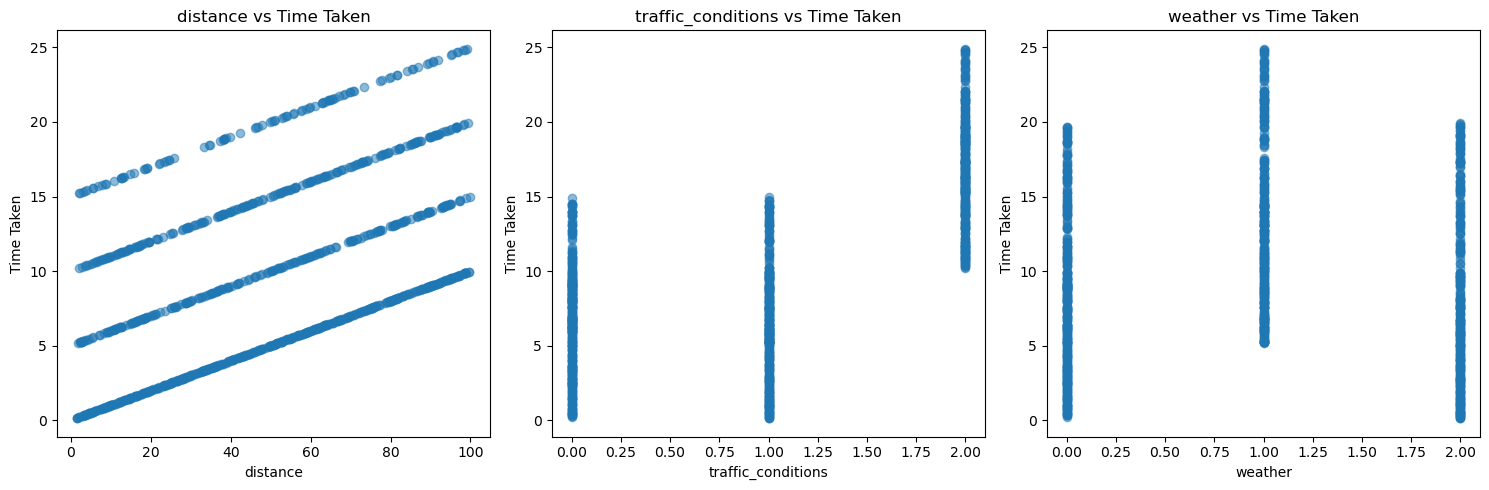

Predicted time taken for the route: [17.88351627]


In [6]:
# Define mapping dictionaries for categorical variables
traffic_conditions_map = {'light': 0, 'moderate': 1, 'heavy': 2}
weather_map = {'sunny': 0, 'rainy': 1, 'snowy': 2}

# Map categorical variables to numerical values
data['traffic_conditions'] = data['traffic_conditions'].map(traffic_conditions_map)
data['weather'] = data['weather'].map(weather_map)

# Separate features (X) and target variable (y)
X = data.drop(columns=["time_taken"])
y = data["time_taken"]

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)  # Train on the entire dataset

# Plotting the relationship between each feature and the target variable
fig, axs = plt.subplots(1, len(X.columns), figsize=(15, 5))

for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y, alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Time Taken')
    axs[i].set_title(f'{feature} vs Time Taken')

plt.tight_layout()
plt.show()

# Assuming you have new data for prediction
new_data = pd.DataFrame({
    'distance': [80],
    'traffic_conditions': ['heavy'],  # Assuming heavy traffic
    'weather': ['rainy']  # Assuming rainy weather
})

# Map categorical variables to numerical values in the new data
new_data['traffic_conditions'] = new_data['traffic_conditions'].map(traffic_conditions_map)
new_data['weather'] = new_data['weather'].map(weather_map)

# Make prediction for the new data
prediction = model.predict(new_data)

print("Predicted time taken for the route:", prediction)

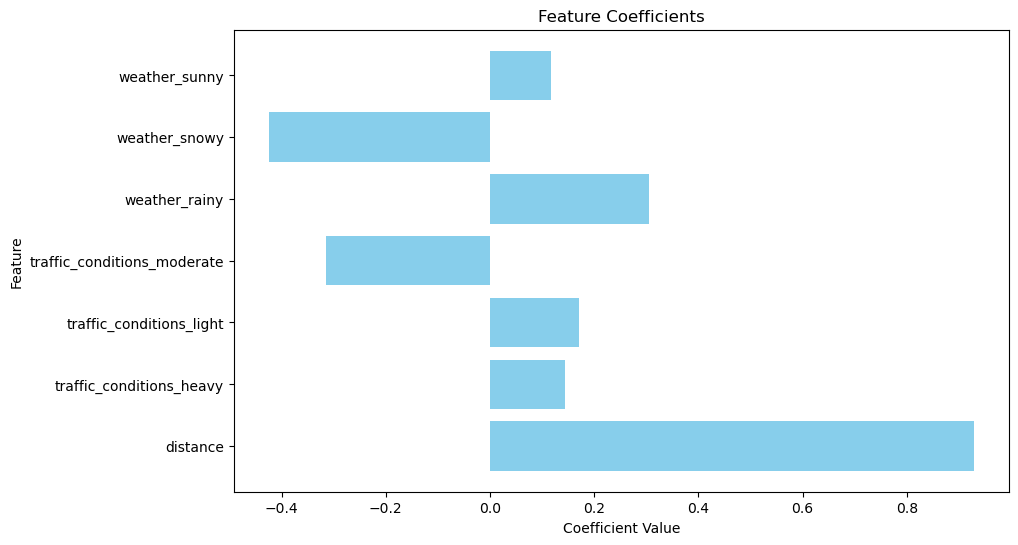

Predicted probability of time taken being above the threshold: [1.]


In [7]:
# Load transportation data
data = pd.read_csv("transportation_data.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=["traffic_conditions", "weather"])

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=["time_taken"])
y = data_encoded["time_taken"]

# Initialize the threshold to the minimum time taken
threshold = y.min()

# Check if both classes are present in the data
while True:
    y_binary = (y > threshold).astype(int)
    if len(set(y_binary)) < 2:
        threshold += 1  # Increment the threshold
    else:
        break

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X, y_binary)  # Train on the entire dataset

# Plot feature importances (coefficients)
coefficients = model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

# Assuming you have new data for prediction
new_data = pd.DataFrame({
    'distance': [80],
    'traffic_conditions_heavy': [1],  # Assuming heavy traffic
    'traffic_conditions_light': [0],  # Assuming no light traffic
    'traffic_conditions_moderate': [0],  # Assuming no moderate traffic
    'weather_rainy': [1],  # Assuming rainy weather
    'weather_snowy': [0],  # Assuming no snowy weather
    'weather_sunny': [0]  # Assuming no sunny weather
})

# Make prediction probabilities for the new data
prediction_probabilities = model.predict_proba(new_data)[:, 1]  # Probability of belonging to class 1

print("Predicted probability of time taken being above the threshold:", prediction_probabilities)

In [8]:
# Load transportation data
data = pd.read_csv("transportation_data.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=["traffic_conditions", "weather"])

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=["time_taken"])
y = data_encoded["time_taken"]

# Standardize the features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Initialize and train the SVR model
model = SVR(kernel='linear')
model.fit(X_scaled, y_scaled)

# Assuming you have new data for prediction
new_data = pd.DataFrame({
    'distance': [80],
    'traffic_conditions_heavy': [1],  # Assuming heavy traffic
    'traffic_conditions_light': [0],  # Assuming no light traffic
    'traffic_conditions_moderate': [0],  # Assuming no moderate traffic
    'weather_rainy': [1],  # Assuming rainy weather
    'weather_snowy': [0],  # Assuming no snowy weather
    'weather_sunny': [0]  # Assuming no sunny weather
})

# Standardize the new data
new_data_scaled = scaler_X.transform(new_data)

# Make predictions for the new data
prediction_scaled = model.predict(new_data_scaled)
prediction = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()

print("Predicted time taken for the route:", prediction)

Predicted time taken for the route: [22.40486692]


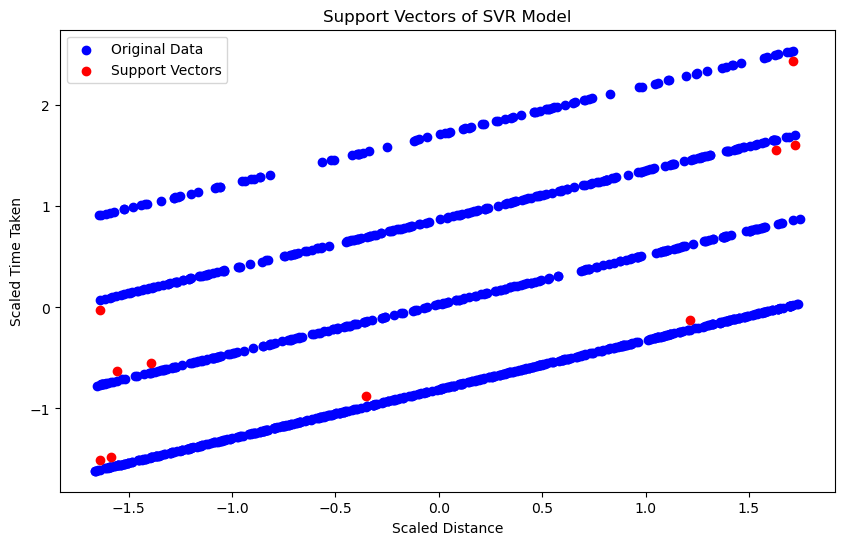

In [9]:
# Load transportation data
data = pd.read_csv("transportation_data.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=["traffic_conditions", "weather"])

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=["time_taken"])
y = data_encoded["time_taken"]

# Standardize the features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Initialize and train the SVR model
model = SVR(kernel='linear')
model.fit(X_scaled, y_scaled)

# Get support vectors
support_vectors = model.support_vectors_

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], y_scaled, color='blue', label='Original Data')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], model.predict(support_vectors), color='red', label='Support Vectors')

plt.xlabel('Scaled Distance')
plt.ylabel('Scaled Time Taken')
plt.title('Support Vectors of SVR Model')
plt.legend()
plt.show()

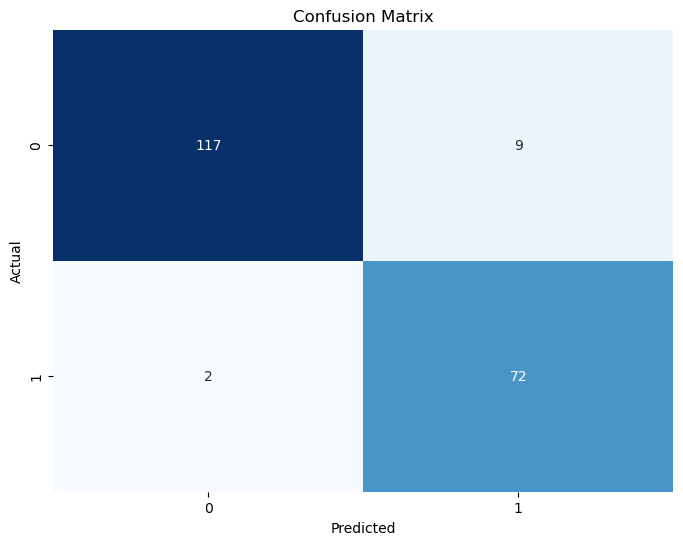

In [10]:
# Load transportation data
data = pd.read_csv("transportation_data.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=["traffic_conditions", "weather"])

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=["time_taken"])
y = data_encoded["time_taken"]

# Standardize the features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize and train the SVR model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Define a threshold to classify predictions
threshold = 0  # Define your threshold here

# Convert predictions to binary classes based on the threshold
predictions_binary = (predictions > threshold).astype(int)

# Convert actual y values to binary classes based on the threshold
y_test_binary = (y_test > threshold).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_binary, predictions_binary)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()